In [83]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE

import joblib

In [3]:
df_dogs = pd.read_csv("dogs_cleaned_wybrane_cechy_rasy.csv")
df_people = pd.read_excel("survey_wersja_ostateczna.xlsx")

In [4]:
df_dogs.shape

(26, 12)

In [5]:
df_people.shape

(1597, 11)

In [6]:
df_dogs.head()

,Breed Name,Detailed Description Link,Dog Size,"Avg. Life Span, years",Tolerates Being Alone,Kid-Friendly,Dog Friendly,Friendly Toward Strangers,Health And Grooming Needs,Size,Easy To Train,Energy Level
0,Australian Shepherd,https://dogtime.com/dog-breeds/australian-shep...,Very Large,14,2,4,5,3,2.2,3,5,5
1,Beagle,https://dogtime.com/dog-breeds/beagle,Medium,12,1,5,5,5,2.8,2,1,4
2,Bernese Mountain Dog,https://dogtime.com/dog-breeds/bernese-mountai...,Very Large,8,1,5,3,5,3.4,5,4,4
3,Border Collie,https://dogtime.com/dog-breeds/border-collie,Large,14,1,4,3,5,2.4,3,5,5
4,Boston Terrier,https://dogtime.com/dog-breeds/boston-terrier,Medium,14,3,5,5,4,3.0,2,4,4


In [7]:
df_people.head()

,Activity_Level,Has_Children,Has_Other_Dog,Daily_Time_Hours,Time_Away_Frequency,Wants_Training,Living_Situation,Lifespan_Important,Stranger_Friendliness,Preferred_Size,Recommended_Breed
0,Moderate,No,No,1-3,Moderate,Yes,House with Yard,Yes,Moderate,Medium,Labrador Retriever
1,High,Yes,No,1-3,Low,Yes,House with Yard,Yes,High,Large,Border Collie
2,Low,No,Yes,Less than 1,High,No,Apartment,Yes,Low,Small,French Bulldog
3,Moderate,Yes,No,1-3,Moderate,Yes,Apartment,Yes,Moderate,Small,Cocker Spaniel
4,Low,No,No,1-3,Low,No,Apartment,No,Moderate,Very Small,English Bulldog


In [9]:
df_dogs.describe()

,"Avg. Life Span, years",Tolerates Being Alone,Kid-Friendly,Dog Friendly,Friendly Toward Strangers,Health And Grooming Needs,Size,Easy To Train,Energy Level
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,12.346154,1.576923,4.346154,3.807692,3.807692,2.976923,2.692308,3.961538,4.115385
std,2.018758,0.808608,0.935620,1.166850,1.233507,0.607492,1.319674,1.076319,0.951921
min,8.000000,1.000000,2.000000,2.000000,1.000000,1.800000,1.000000,1.000000,2.000000
25%,11.250000,1.000000,4.000000,3.000000,3.000000,2.600000,2.000000,4.000000,3.000000
50%,13.000000,1.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000
75%,14.000000,2.000000,5.000000,5.000000,5.000000,3.400000,3.750000,5.000000,5.000000
max,14.000000,3.000000,5.000000,5.000000,5.000000,4.200000,5.000000,5.000000,5.000000


In [10]:
df_people.describe()

,Activity_Level,Has_Children,Has_Other_Dog,Daily_Time_Hours,Time_Away_Frequency,Wants_Training,Living_Situation,Lifespan_Important,Stranger_Friendliness,Preferred_Size,Recommended_Breed
count,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597,1597
unique,3,2,2,5,3,2,4,2,3,4,28
top,High,No,No,1-3,Moderate,Yes,Apartment,Yes,Moderate,Large,Cocker Spaniel
freq,542,894,1100,953,789,1125,738,1254,697,624,104


In [11]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Breed Name                 26 non-null     object 
 1   Detailed Description Link  26 non-null     object 
 2   Dog Size                   26 non-null     object 
 3   Avg. Life Span, years      26 non-null     int64  
 4   Tolerates Being Alone      26 non-null     int64  
 5   Kid-Friendly               26 non-null     int64  
 6   Dog Friendly               26 non-null     int64  
 7   Friendly Toward Strangers  26 non-null     int64  
 8   Health And Grooming Needs  26 non-null     float64
 9   Size                       26 non-null     int64  
 10  Easy To Train              26 non-null     int64  
 11  Energy Level               26 non-null     int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 2.6+ KB


In [12]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Activity_Level         1597 non-null   object
 1   Has_Children           1597 non-null   object
 2   Has_Other_Dog          1597 non-null   object
 3   Daily_Time_Hours       1597 non-null   object
 4   Time_Away_Frequency    1597 non-null   object
 5   Wants_Training         1597 non-null   object
 6   Living_Situation       1597 non-null   object
 7   Lifespan_Important     1597 non-null   object
 8   Stranger_Friendliness  1597 non-null   object
 9   Preferred_Size         1597 non-null   object
 10  Recommended_Breed      1597 non-null   object
dtypes: object(11)
memory usage: 137.4+ KB


In [13]:
df_dogs.isna().sum().sort_values(ascending=False)

Breed Name                   0
Detailed Description Link    0
Dog Size                     0
Avg. Life Span, years        0
Tolerates Being Alone        0
Kid-Friendly                 0
Dog Friendly                 0
Friendly Toward Strangers    0
Health And Grooming Needs    0
Size                         0
Easy To Train                0
Energy Level                 0
dtype: int64

In [14]:
df_people.isna().sum().sort_values(ascending=False)

Activity_Level           0
Has_Children             0
Has_Other_Dog            0
Daily_Time_Hours         0
Time_Away_Frequency      0
Wants_Training           0
Living_Situation         0
Lifespan_Important       0
Stranger_Friendliness    0
Preferred_Size           0
Recommended_Breed        0
dtype: int64

WYKRES DLA: Dog Size


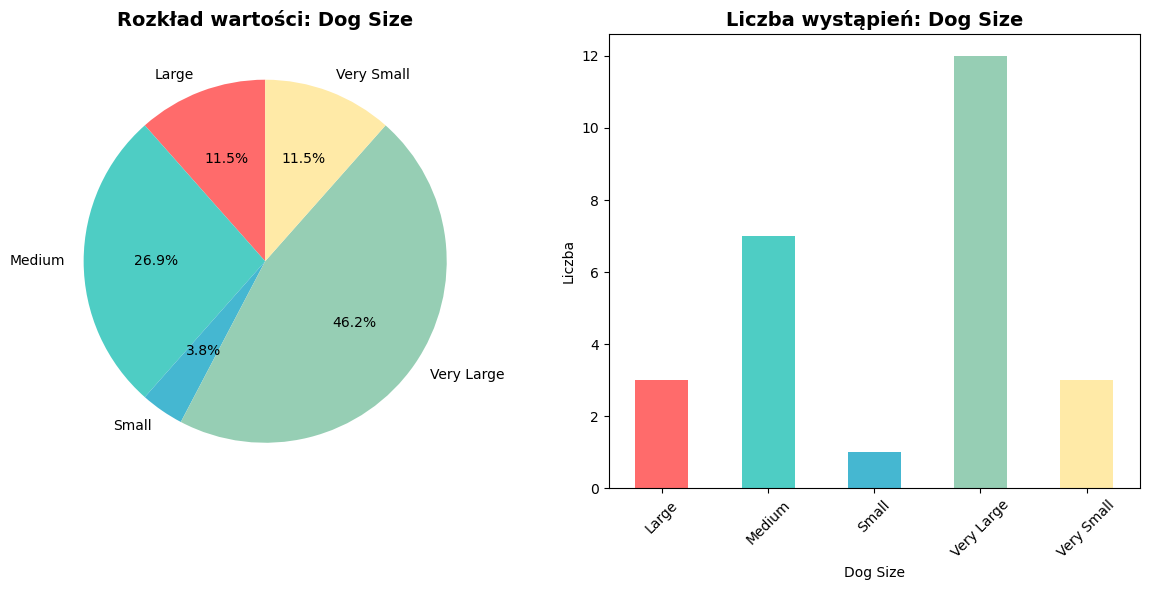

WYKRES DLA: Tolerates Being Alone


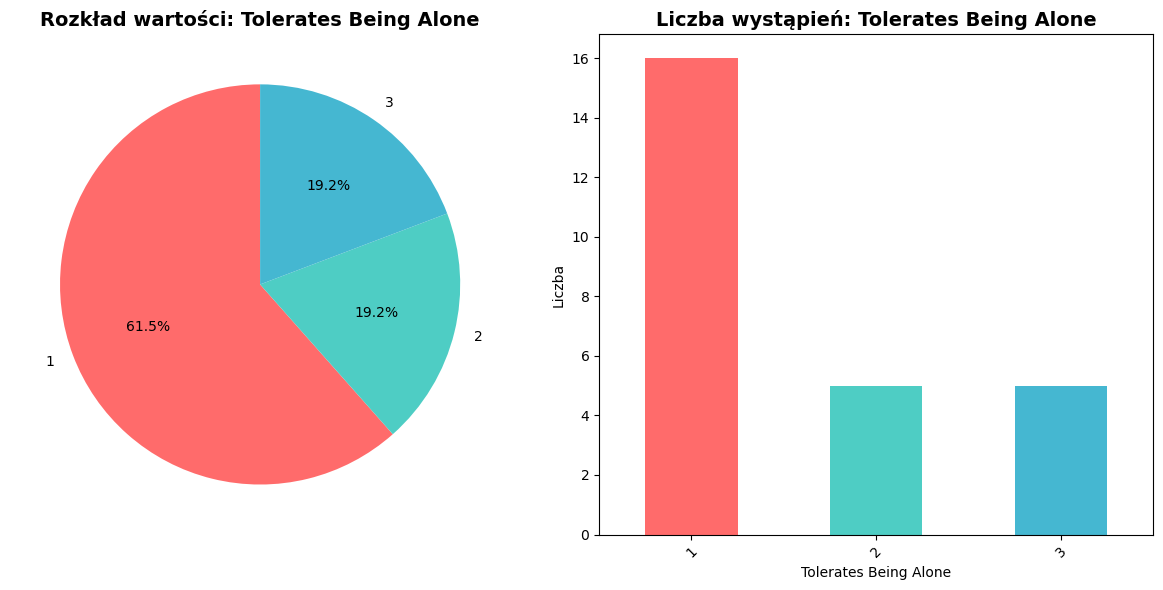

WYKRES DLA: Kid-Friendly


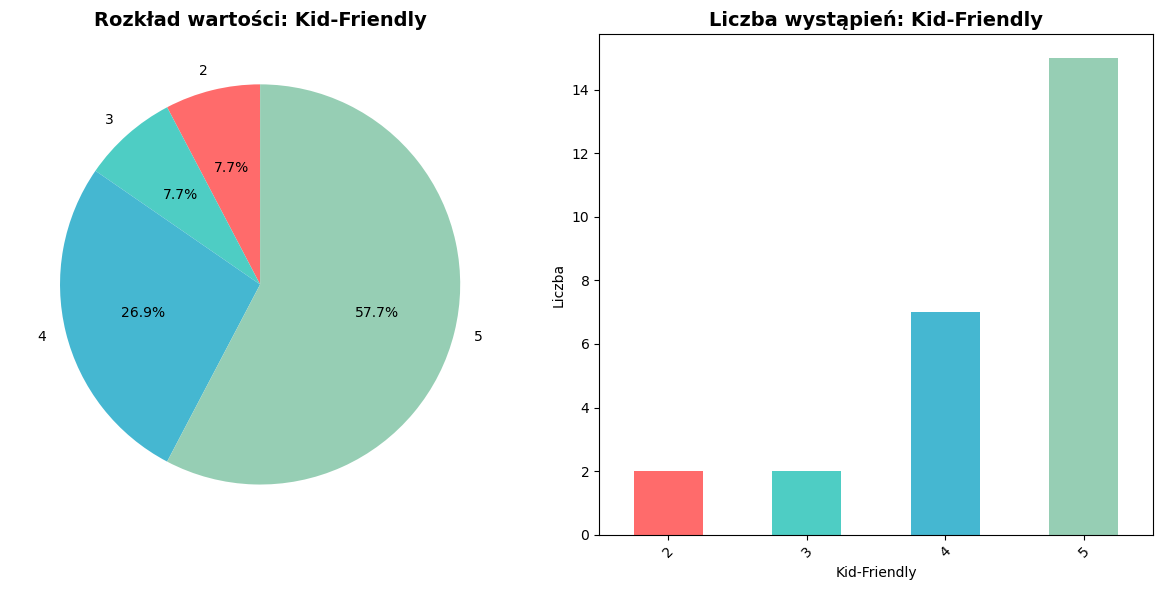

WYKRES DLA: Dog Friendly


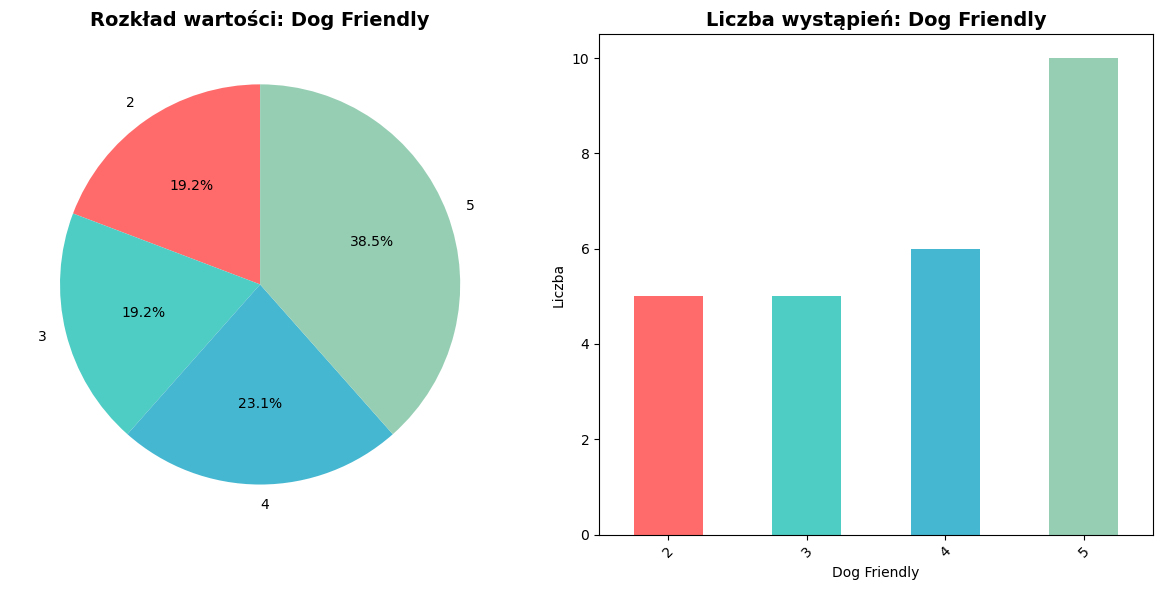

WYKRES DLA: Friendly Toward Strangers


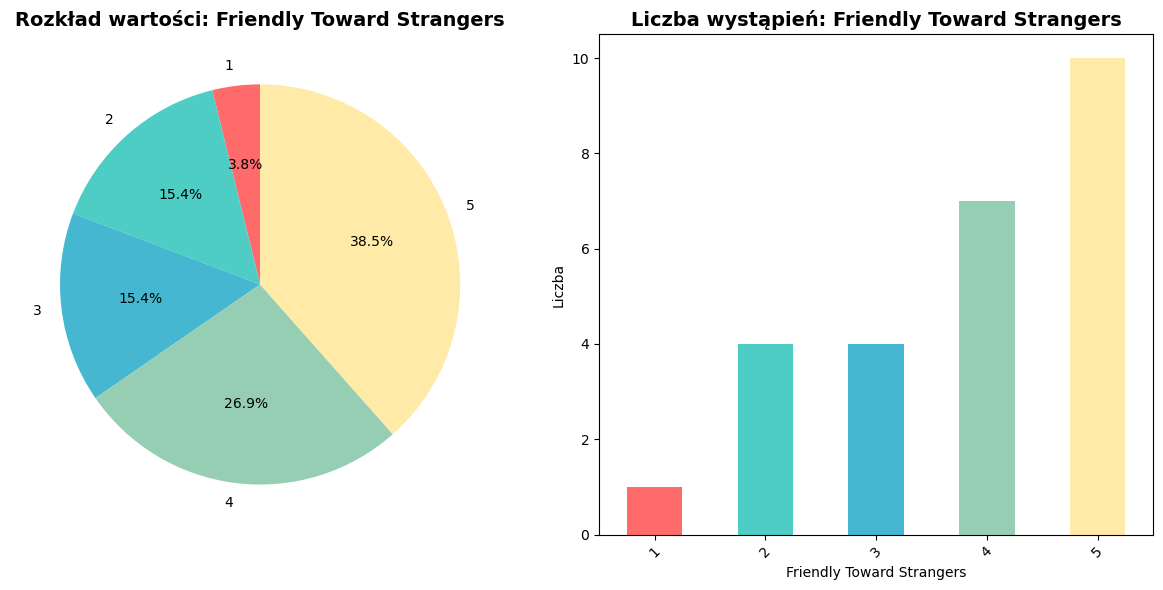

WYKRES DLA: Health And Grooming Needs


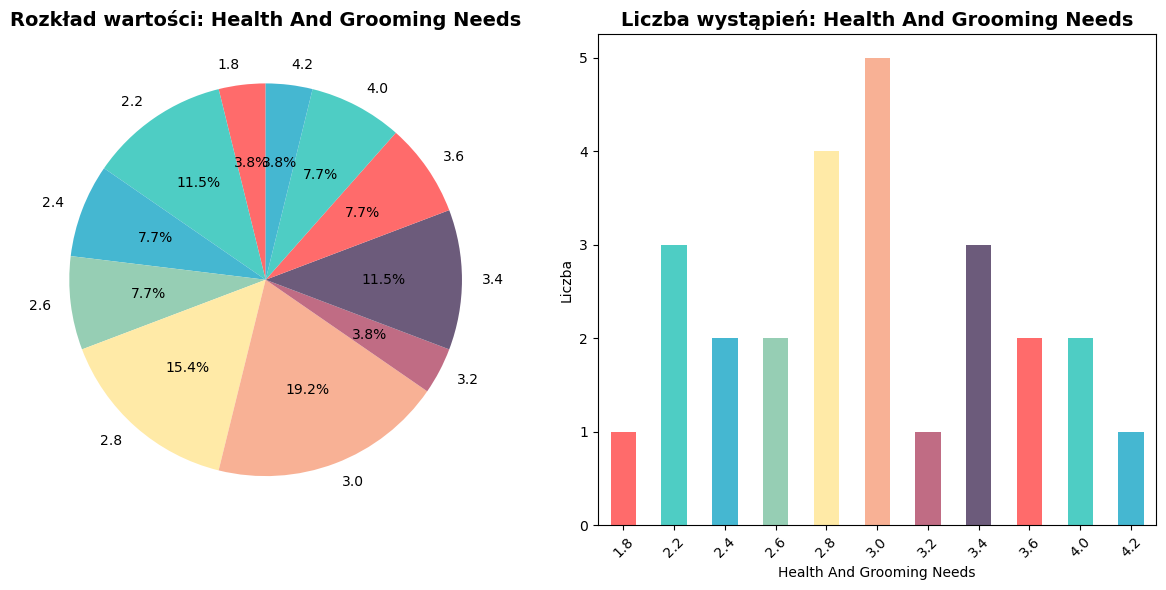

WYKRES DLA: Easy To Train


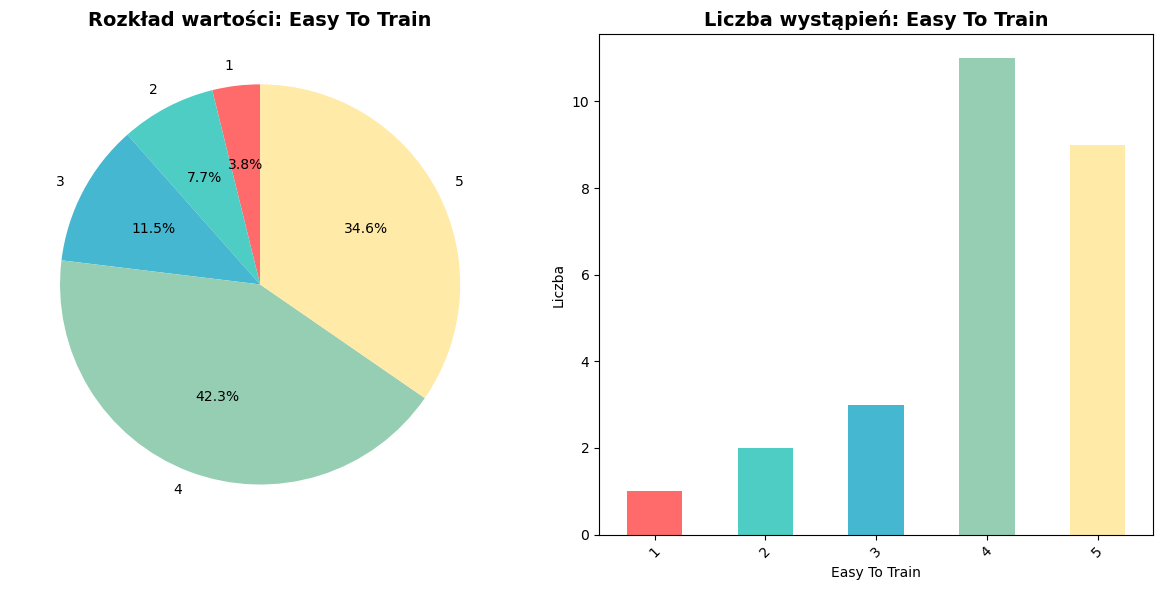

WYKRES DLA: Energy Level


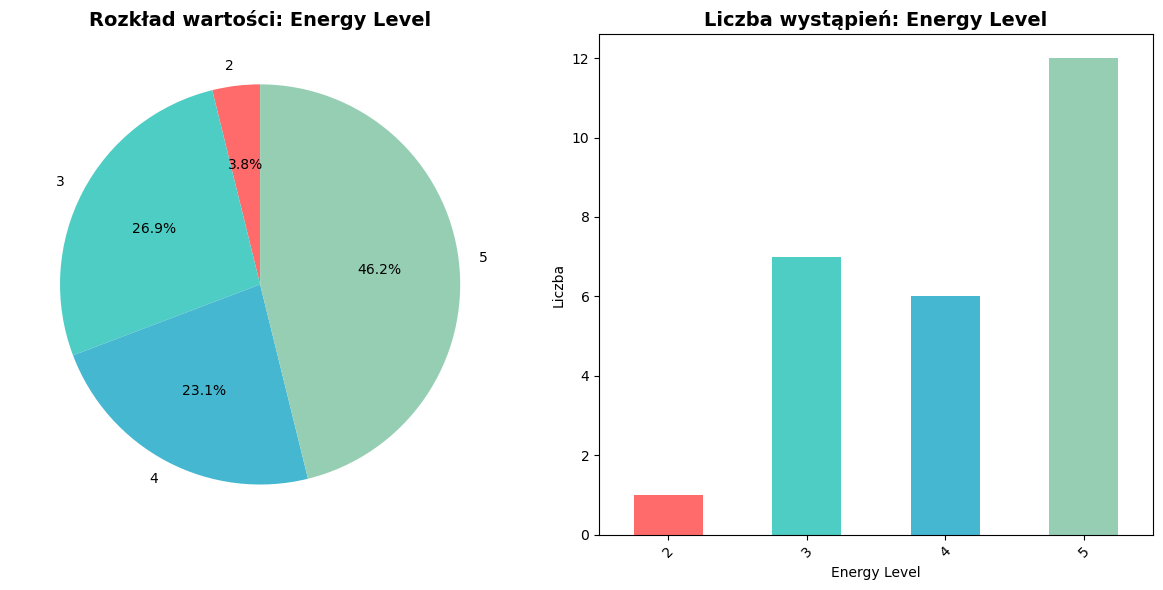

In [76]:
# Lista kolumn kategorycznych lub numerycznych z małą liczbą unikalnych wartości
columns_to_plot = [
    'Dog Size', 'Tolerates Being Alone', 'Kid-Friendly',
    'Dog Friendly', 'Friendly Toward Strangers',
    'Health And Grooming Needs', 'Easy To Train', 'Energy Level'
]

# Kolory do wykresów
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#F8B195', '#C06C84', '#6C5B7B']

for col in columns_to_plot:
    print("=" * 50)
    print(f"WYKRES DLA: {col}")
    print("=" * 50)

    plt.figure(figsize=(12, 6))

    # Pie Chart
    plt.subplot(1, 2, 1)
    value_counts = df_dogs[col].value_counts().sort_index()
    plt.pie(value_counts.values, labels=value_counts.index,
            autopct='%1.1f%%', colors=colors[:len(value_counts)], startangle=90)
    plt.title(f'Rozkład wartości: {col}', fontsize=14, fontweight='bold')

    # Bar Chart
    plt.subplot(1, 2, 2)
    value_counts.plot(kind='bar', color=colors[:len(value_counts)])
    plt.title(f'Liczba wystąpień: {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Liczba')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

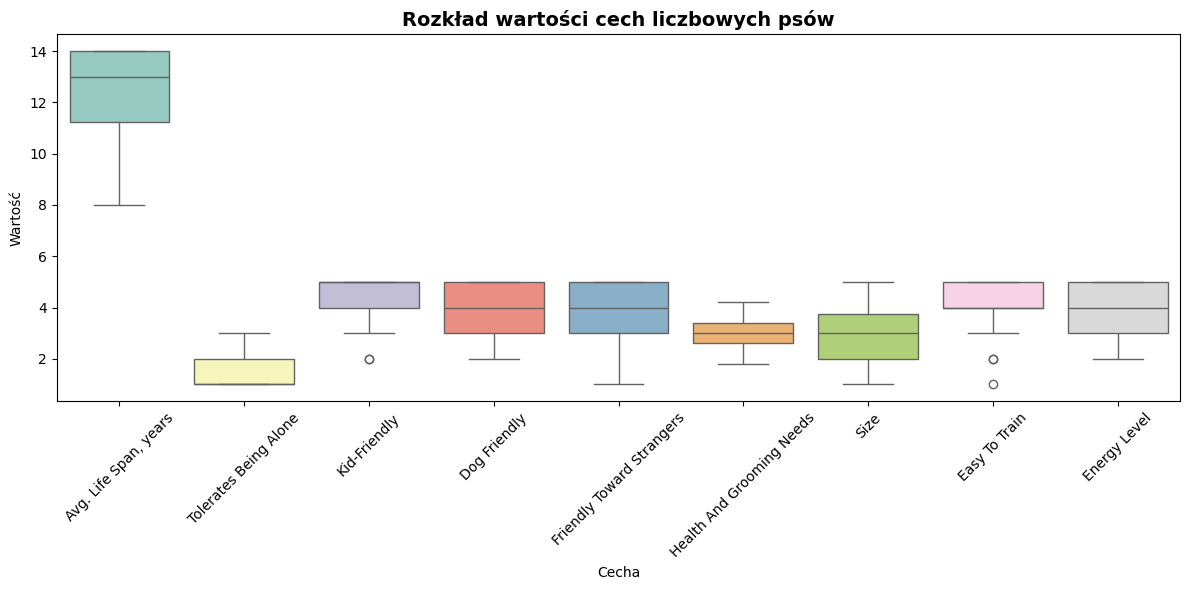

In [80]:
numeric_columns = df_dogs.select_dtypes(include='number').columns

df_long = df_dogs[numeric_columns].melt(var_name='Cecha', value_name='Wartość')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cecha', y='Wartość', hue='Cecha', data=df_long, palette='Set3', legend=False)
plt.title('Rozkład wartości cech liczbowych psów', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

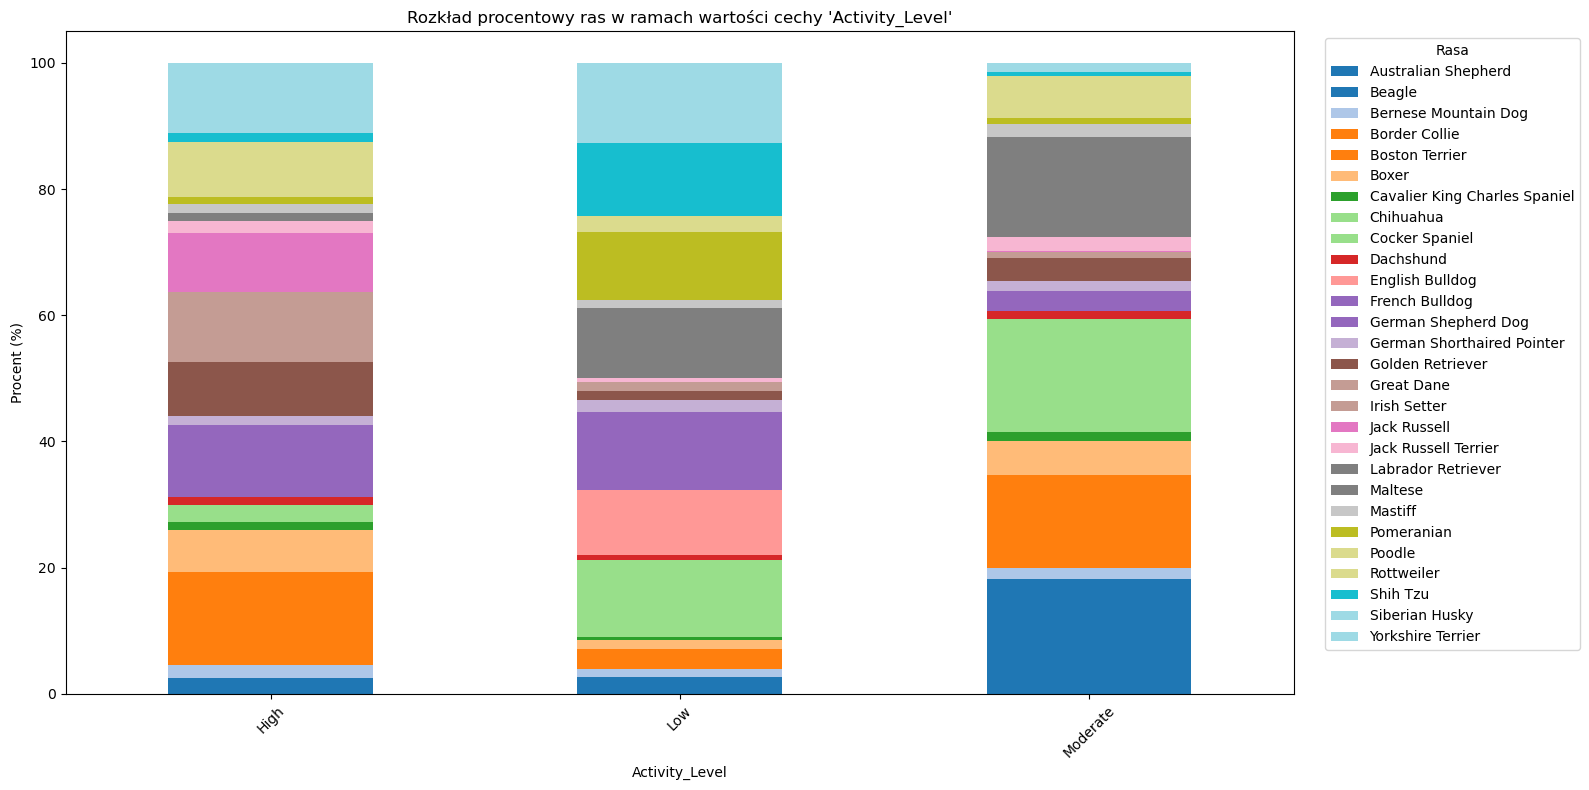

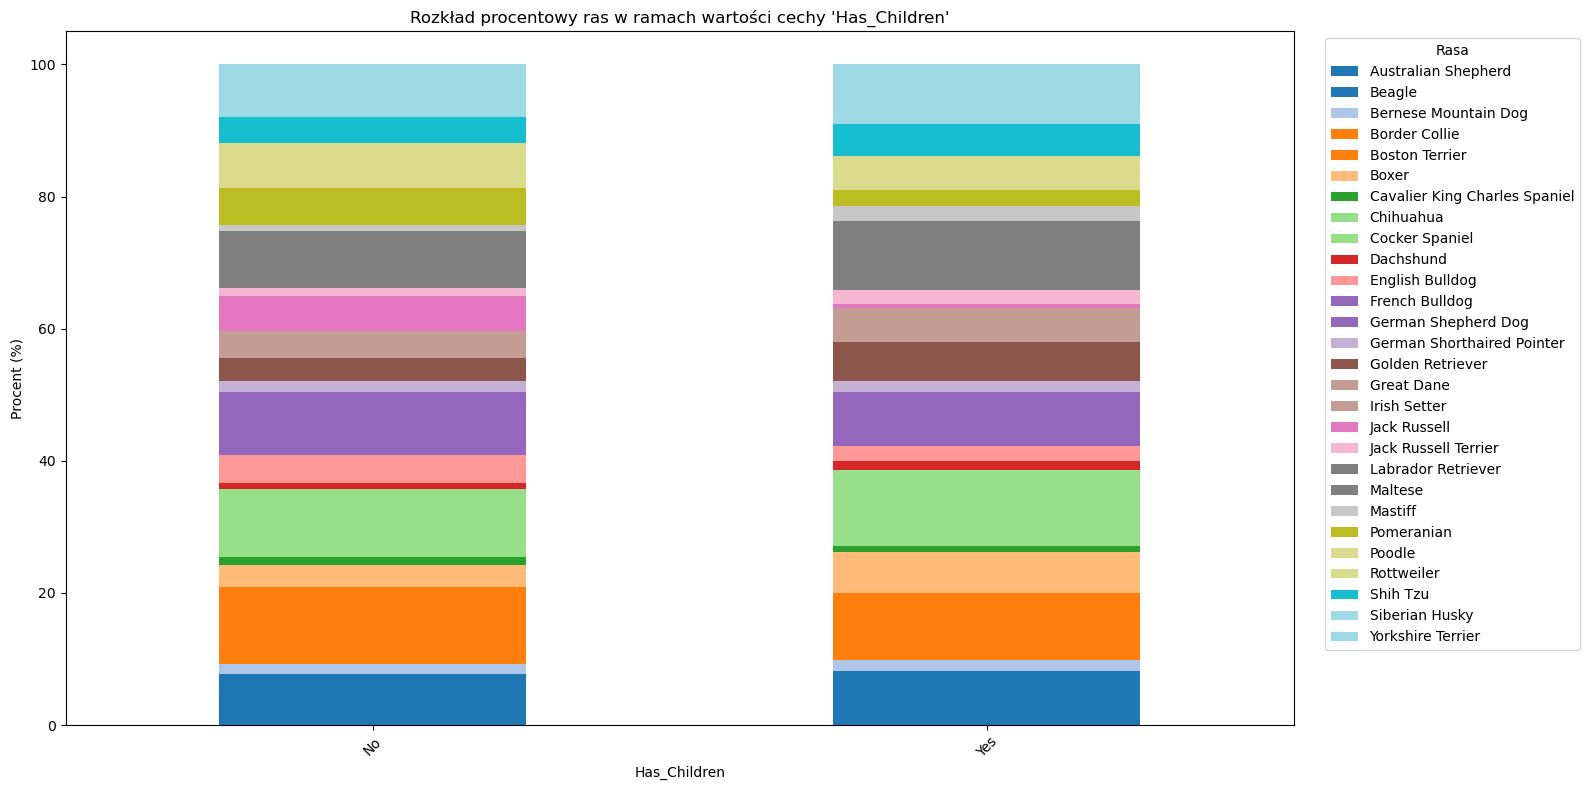

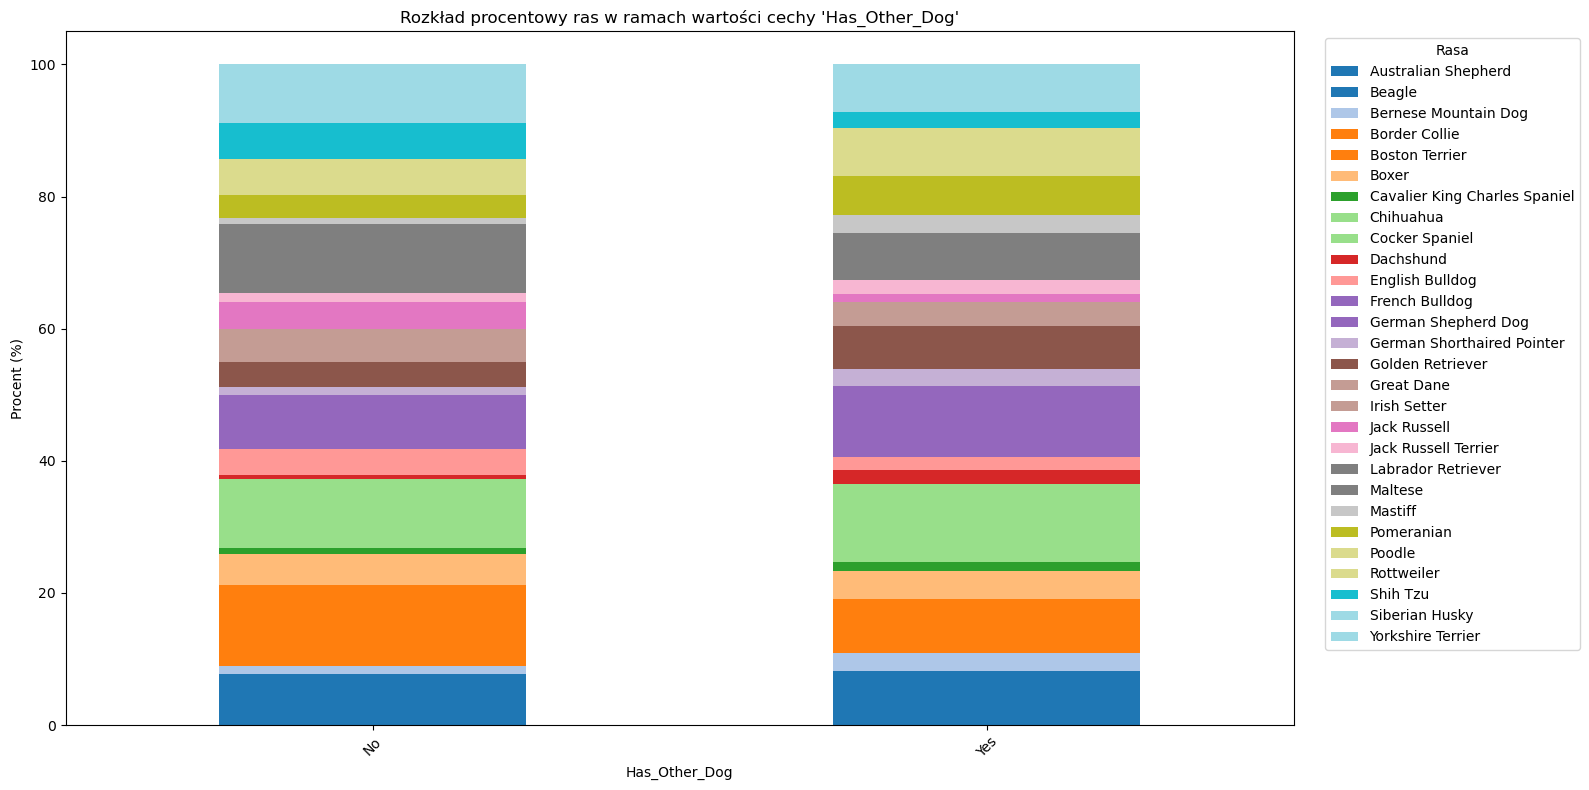

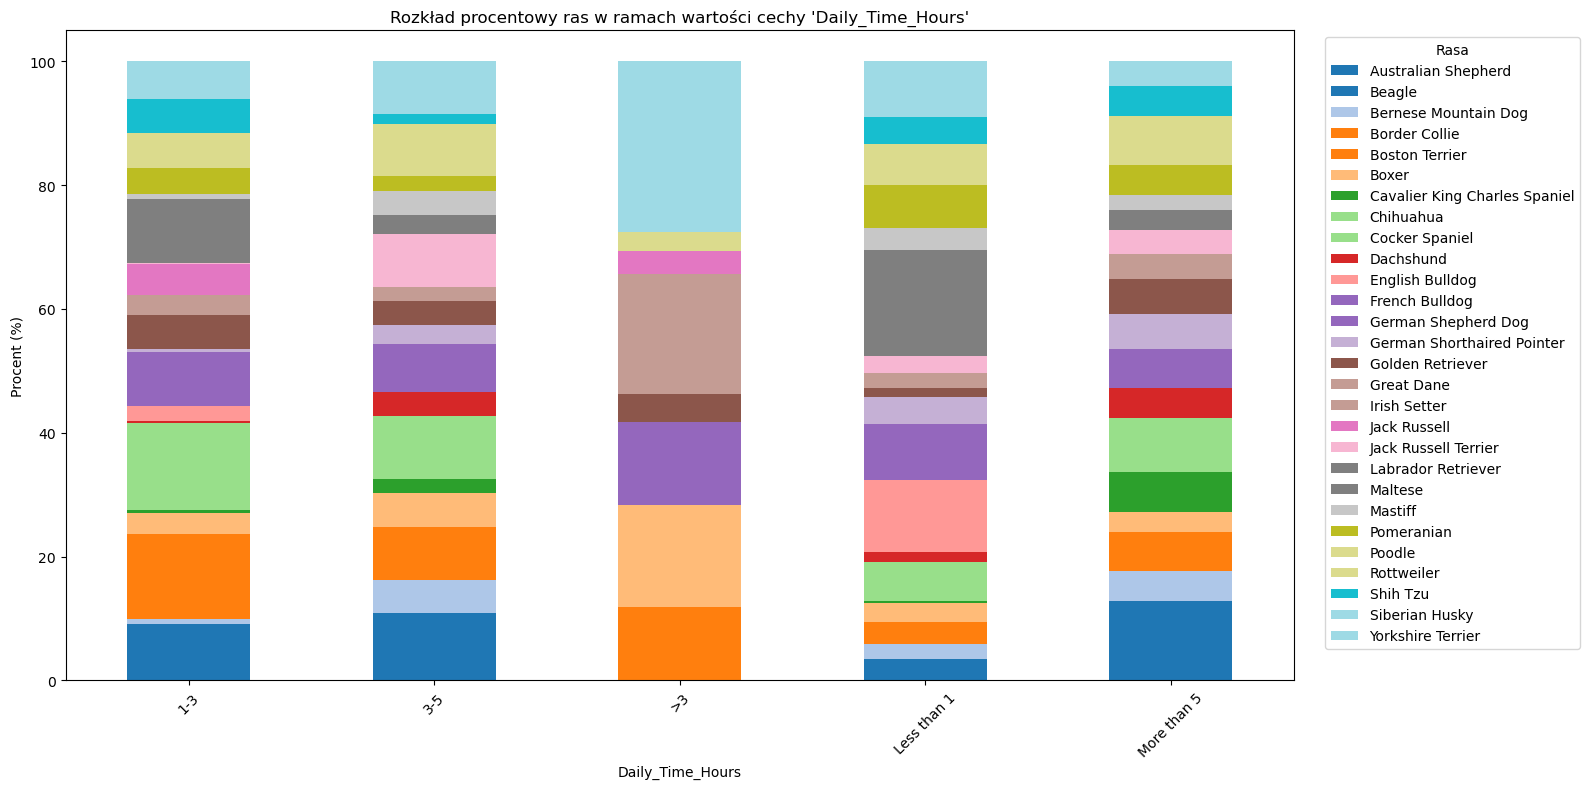

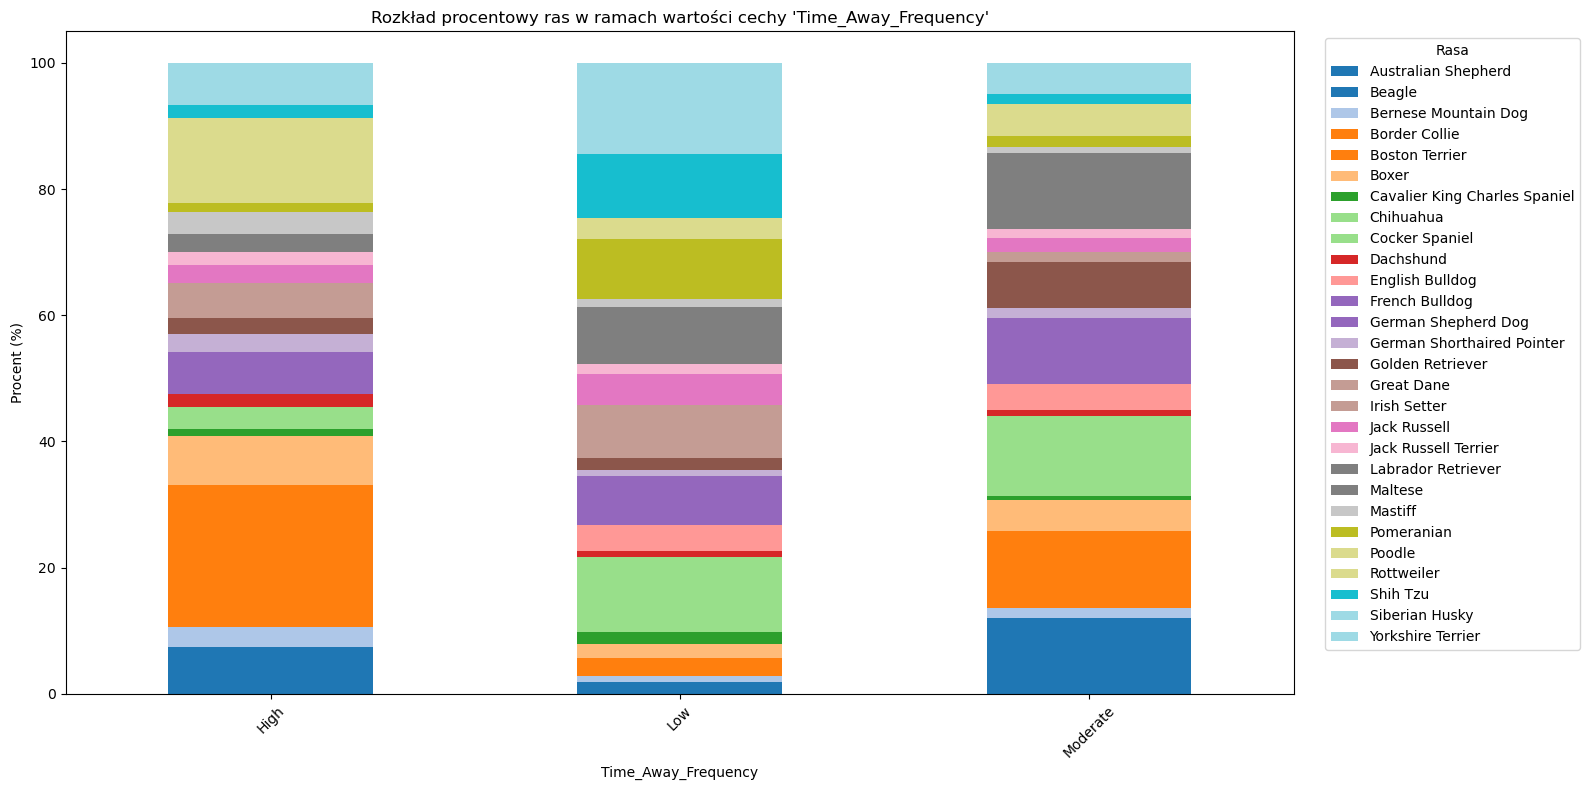

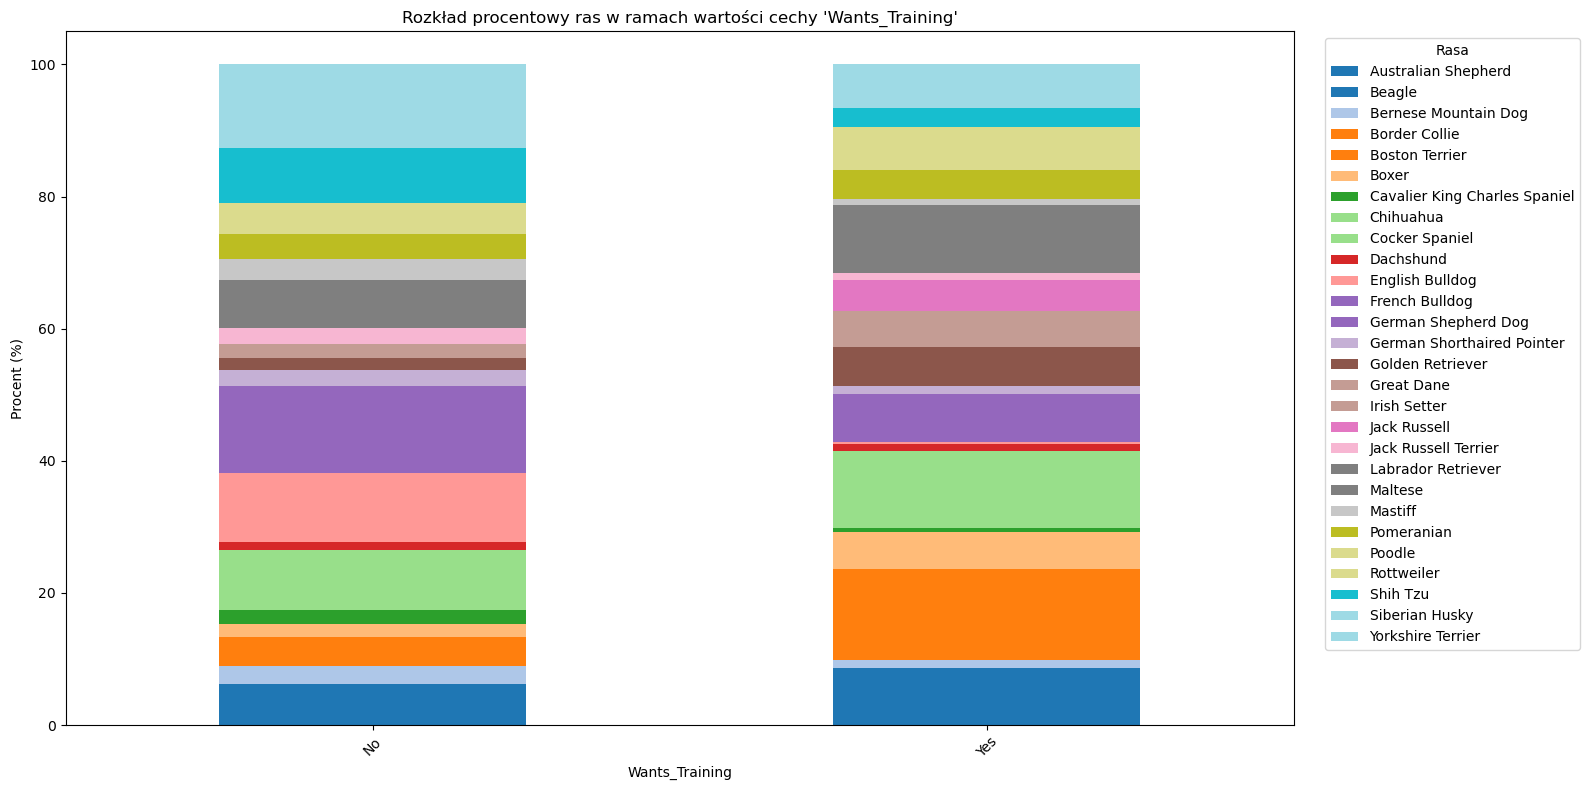

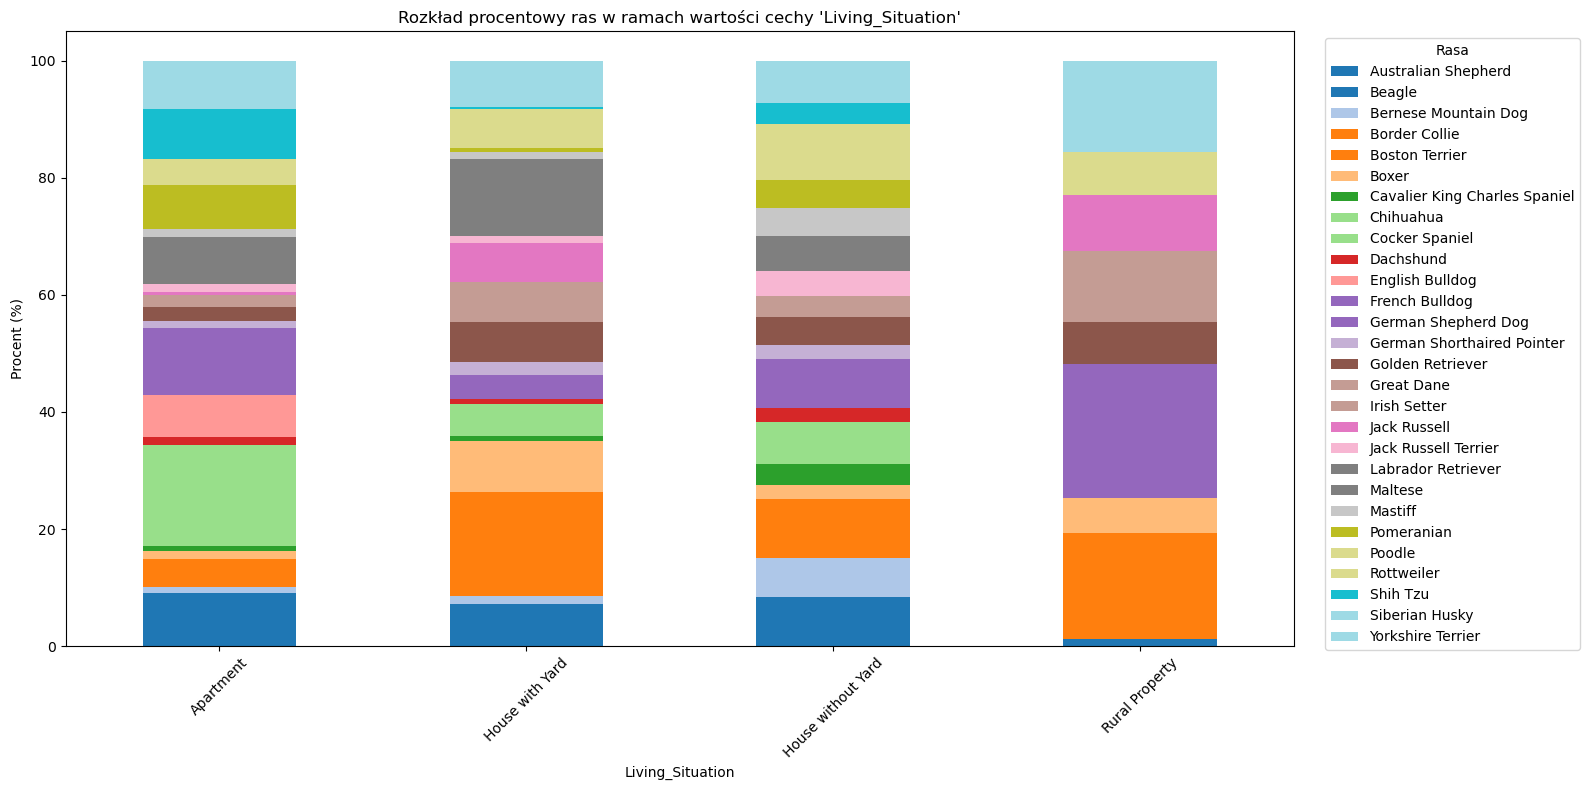

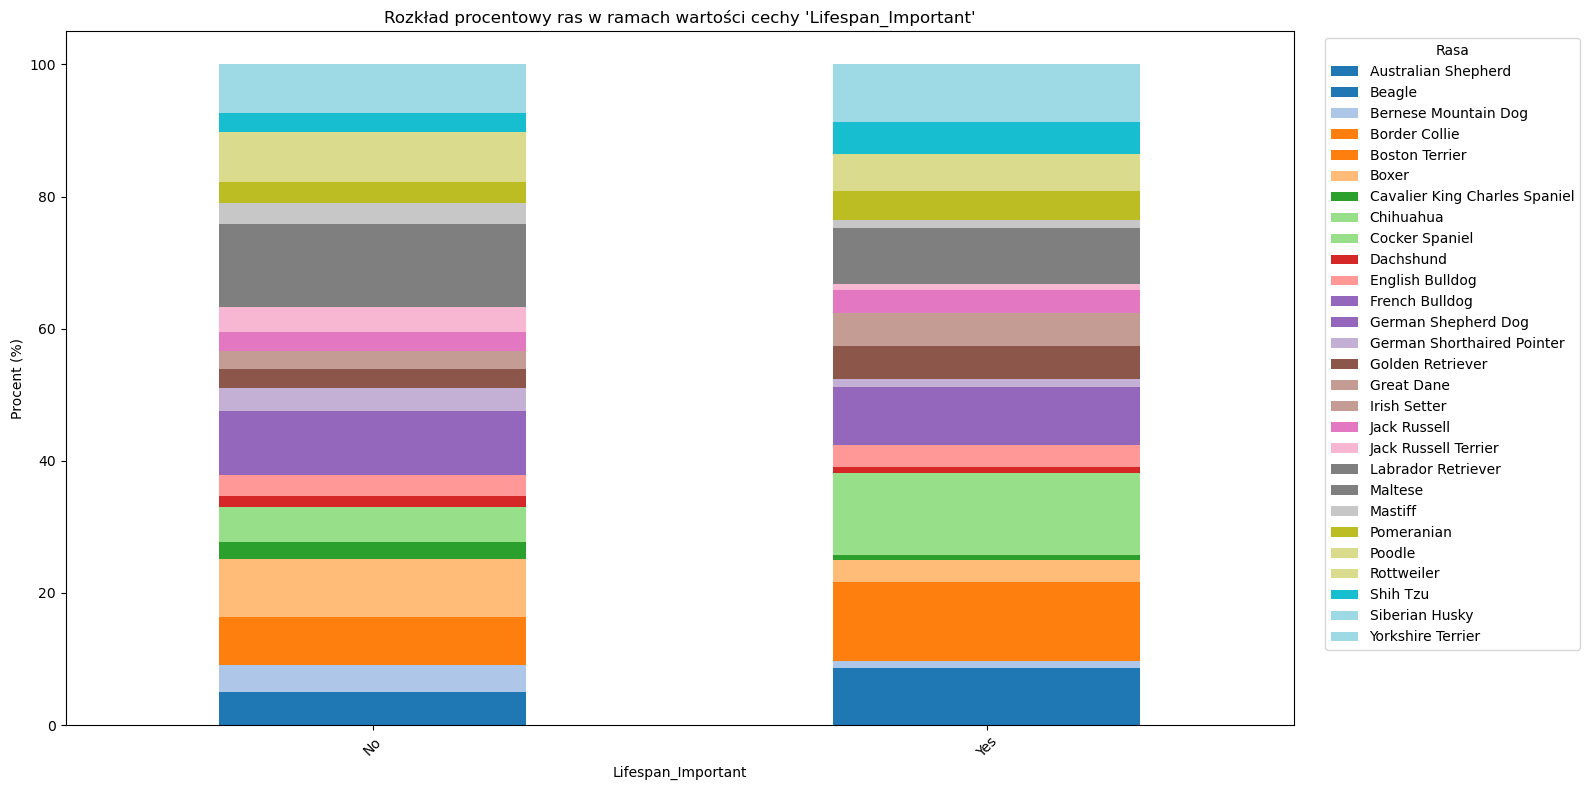

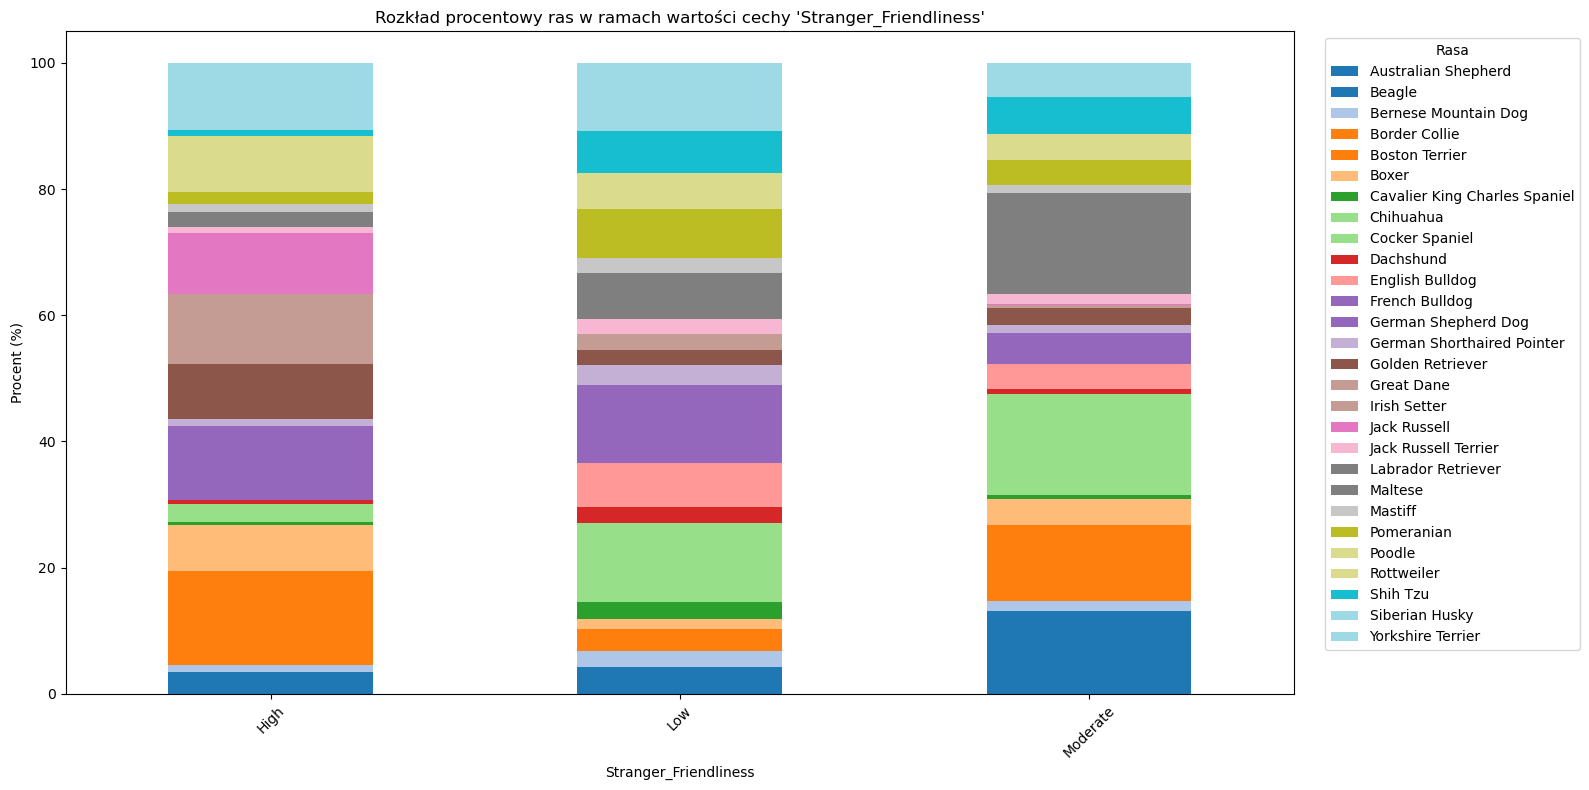

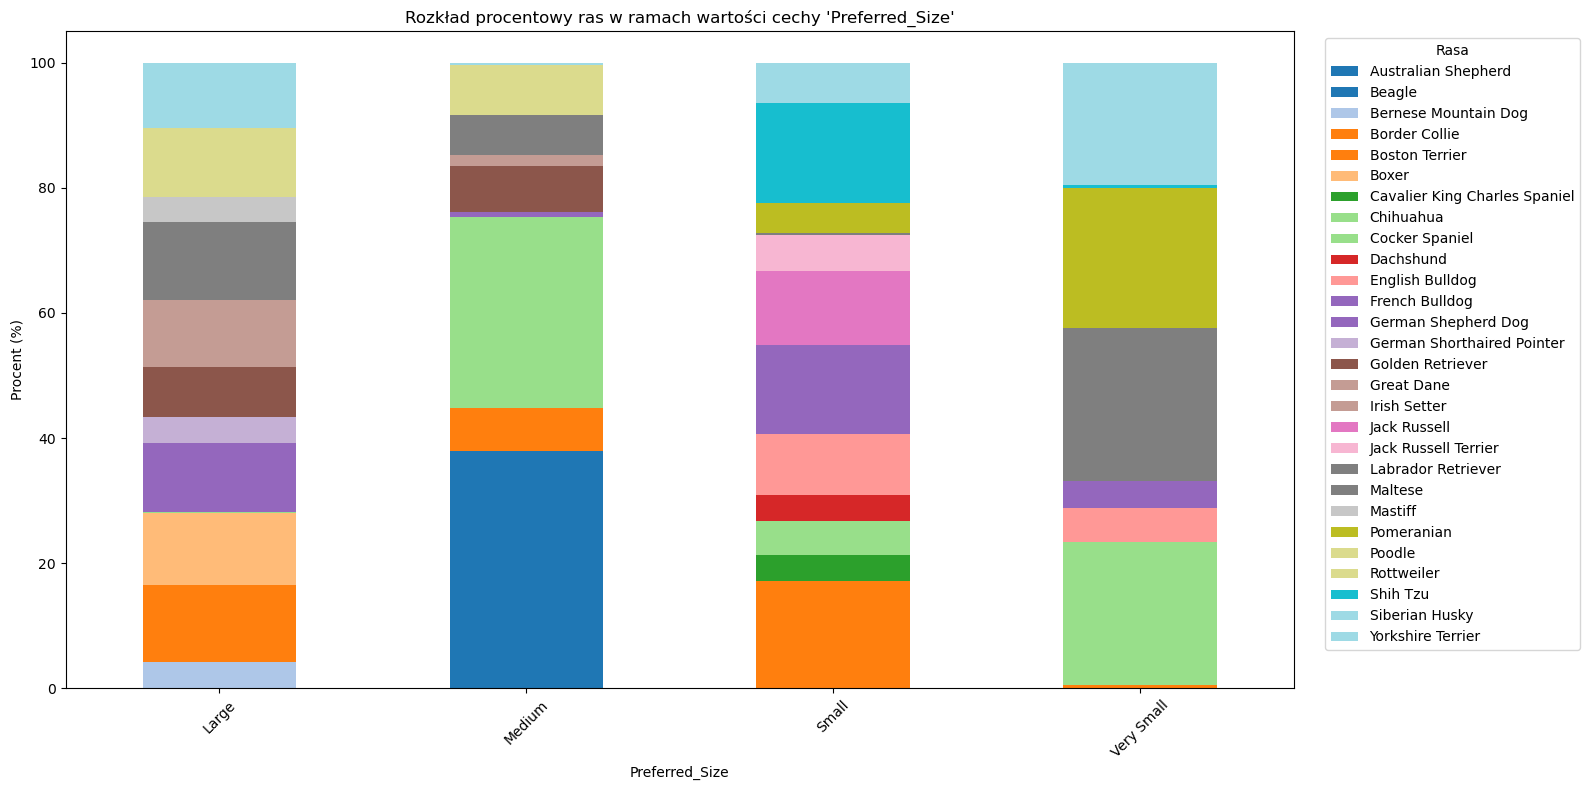

In [92]:
features = [
    'Activity_Level', 'Has_Children', 'Has_Other_Dog', 'Daily_Time_Hours',
    'Time_Away_Frequency', 'Wants_Training', 'Living_Situation',
    'Lifespan_Important', 'Stranger_Friendliness', 'Preferred_Size'
]


for feature in features:
    ctab = pd.crosstab(df_people[feature], df_people['Recommended_Breed'], normalize='index') * 100
    ctab.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20')
    plt.title(f"Rozkład procentowy ras w ramach wartości cechy '{feature}'")
    plt.ylabel("Procent (%)")
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Rasa')
    plt.tight_layout()
    plt.show()

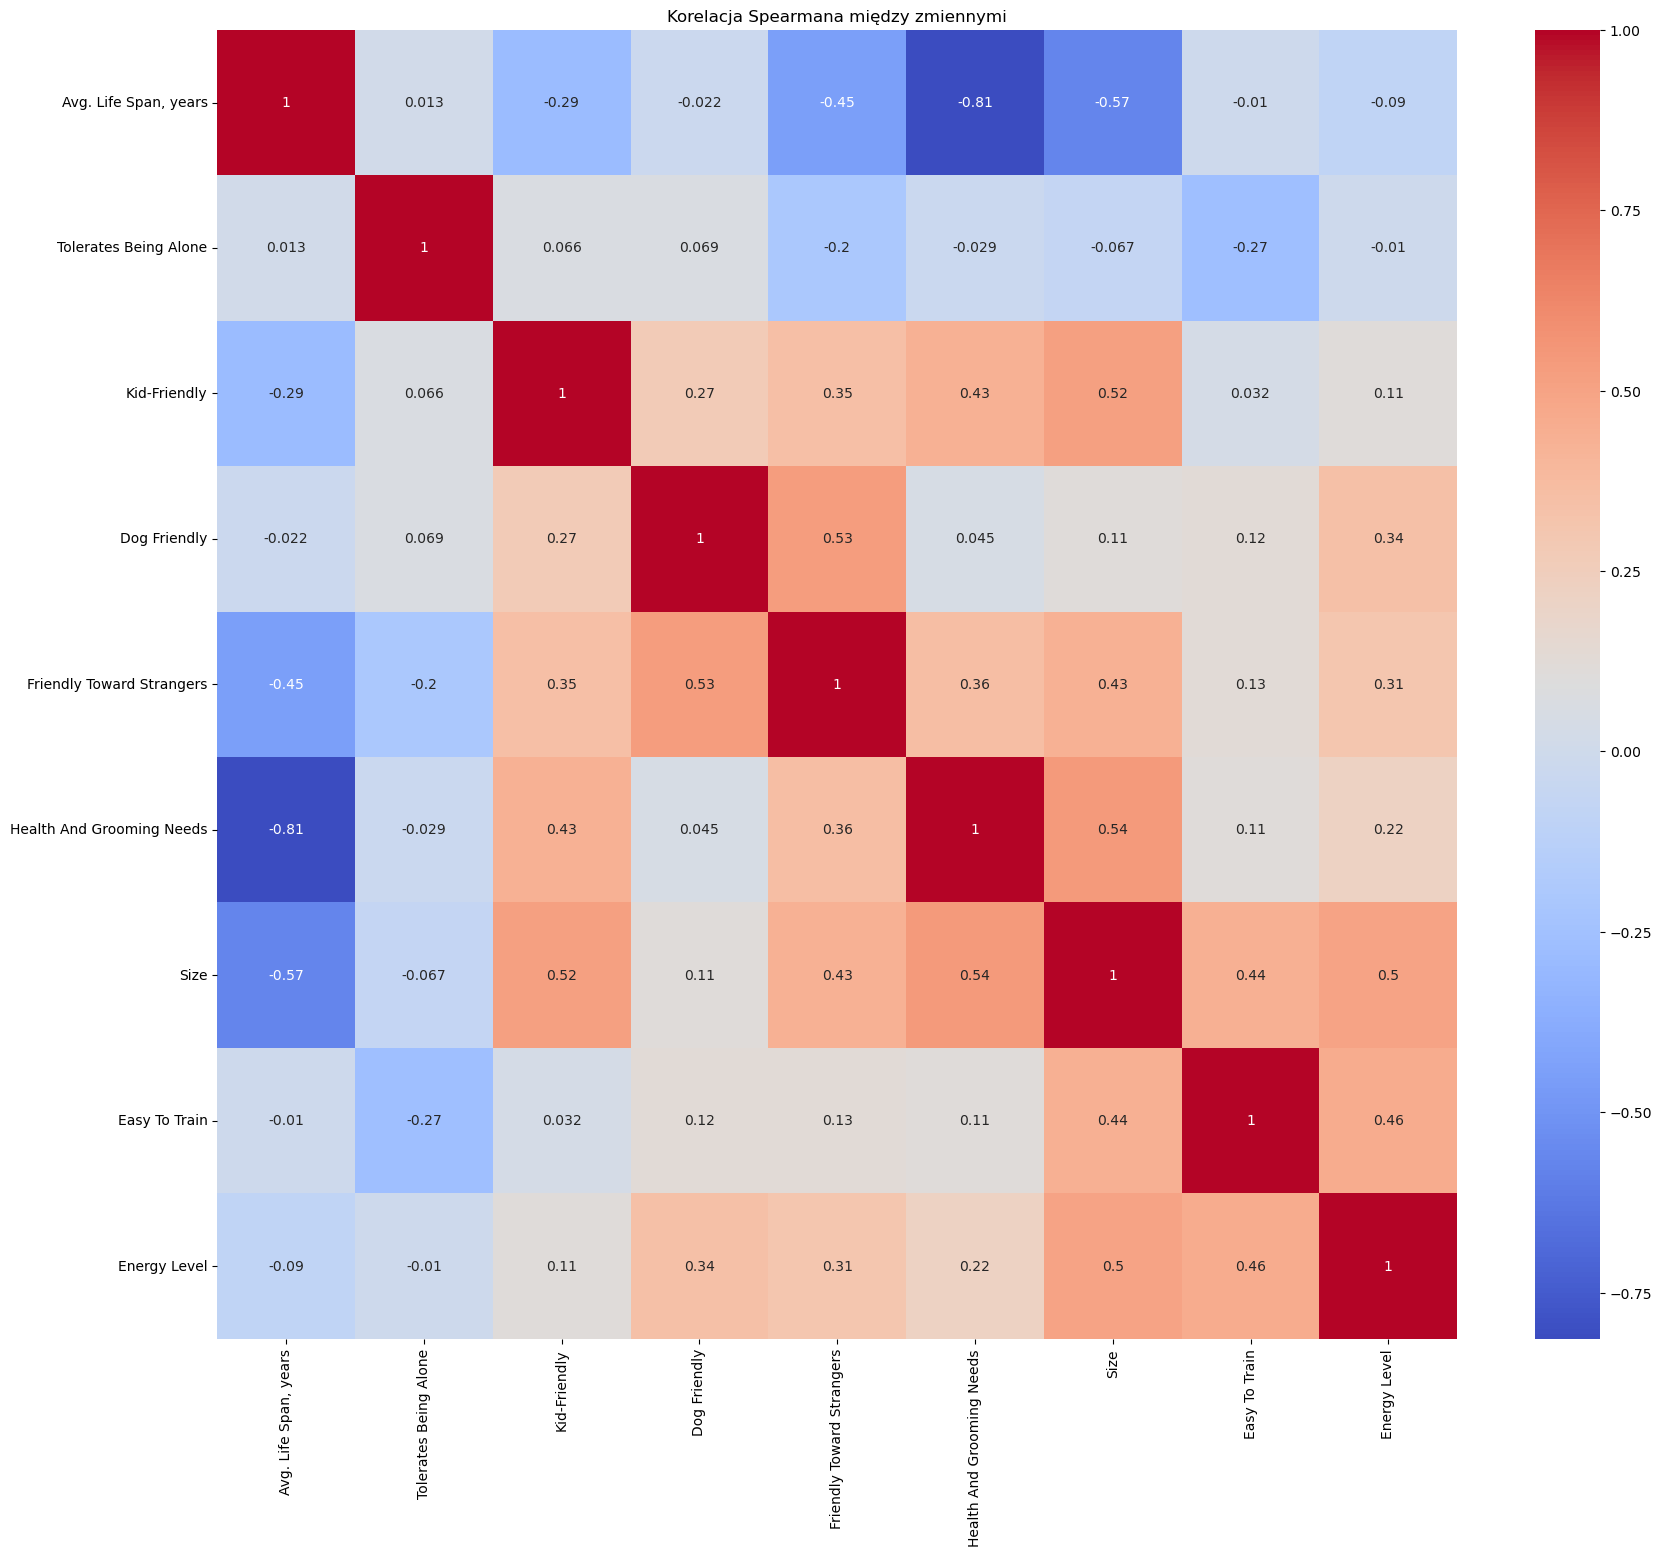

In [66]:
plt.figure(figsize=(20, 17))
sns.heatmap(df_dogs.corr(method='spearman', numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korelacja Spearmana między zmiennymi")
plt.show()

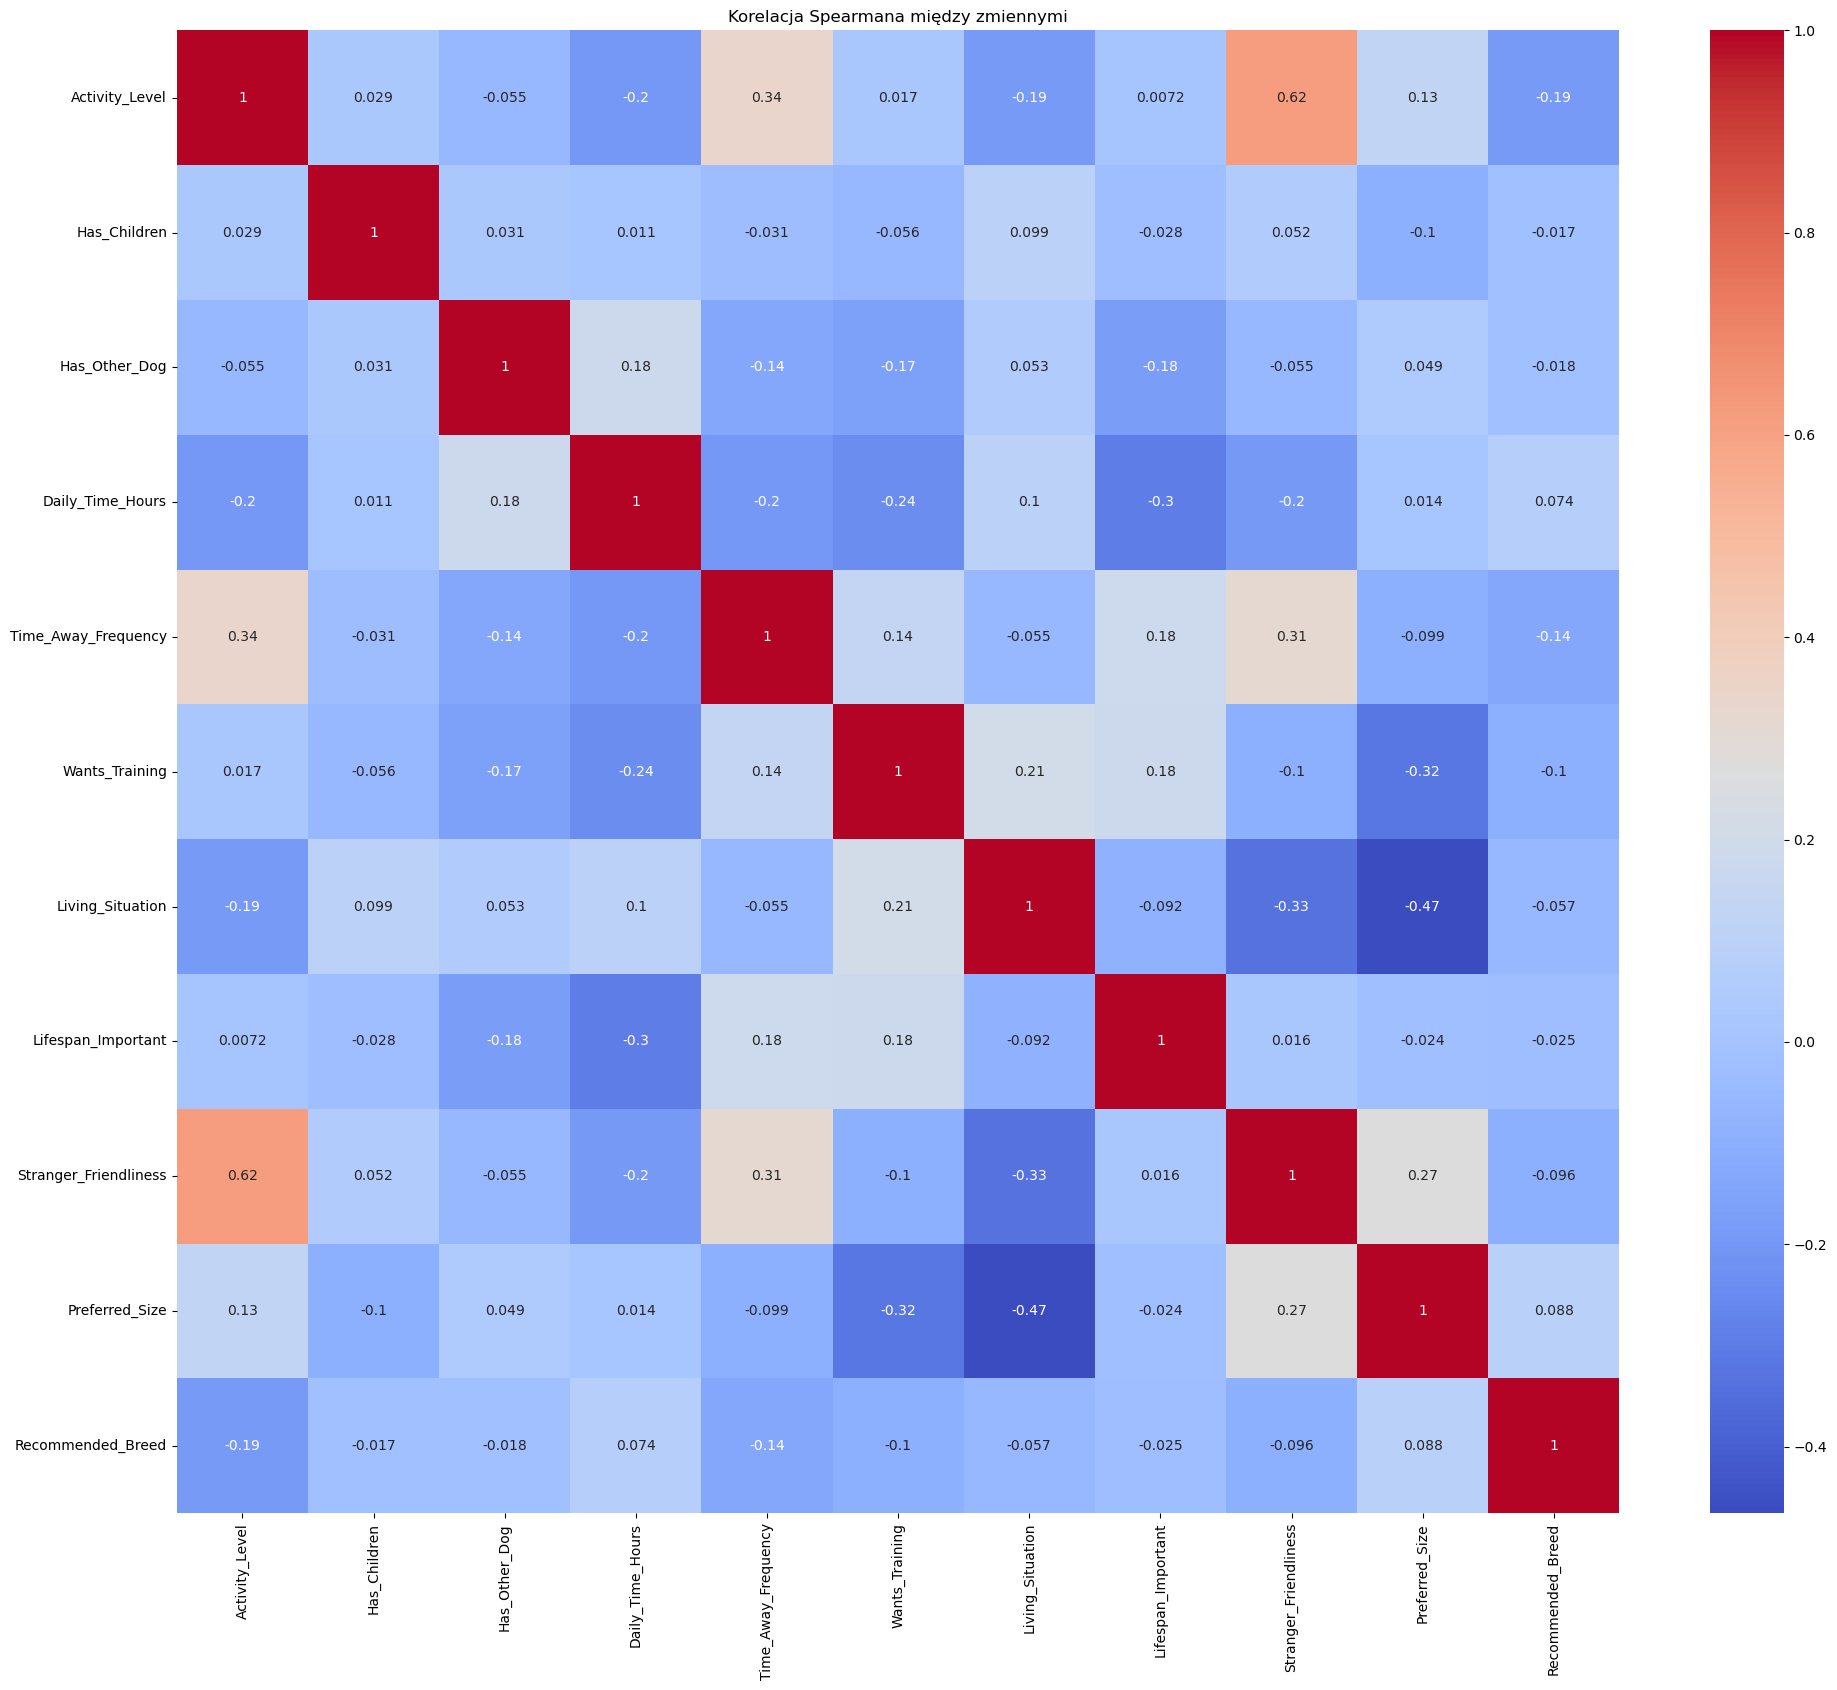

In [67]:
df_encoded = df_people.copy()

for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

if df_encoded.shape[1] > 0:
    plt.figure(figsize=(20, 17))
    sns.heatmap(df_encoded.corr(method='spearman'), annot=True, cmap='coolwarm')
    plt.title("Korelacja Spearmana między zmiennymi")
    plt.tight_layout()
    plt.show()
else:
    print("Brak kolumn liczbowych do wyświetlenia macierzy korelacji.")

c:\Users\annze\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


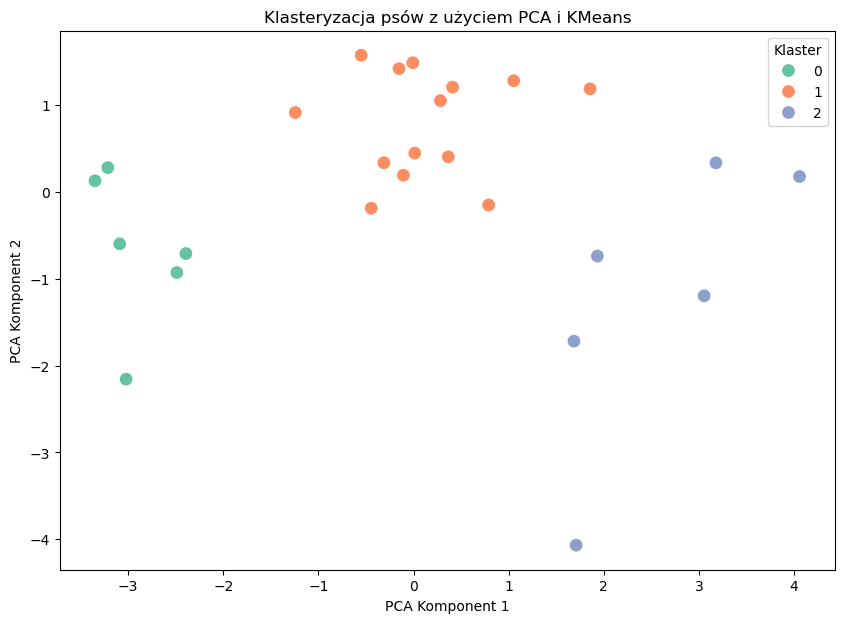

In [86]:
numeric_cols = df_dogs.select_dtypes(include='number').columns
X = df_dogs[numeric_cols]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)


df_dogs['Cluster'] = clusters


plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=100)
plt.title('Klasteryzacja psów z użyciem PCA i KMeans')
plt.xlabel('PCA Komponent 1')
plt.ylabel('PCA Komponent 2')
plt.legend(title='Klaster')
plt.show()

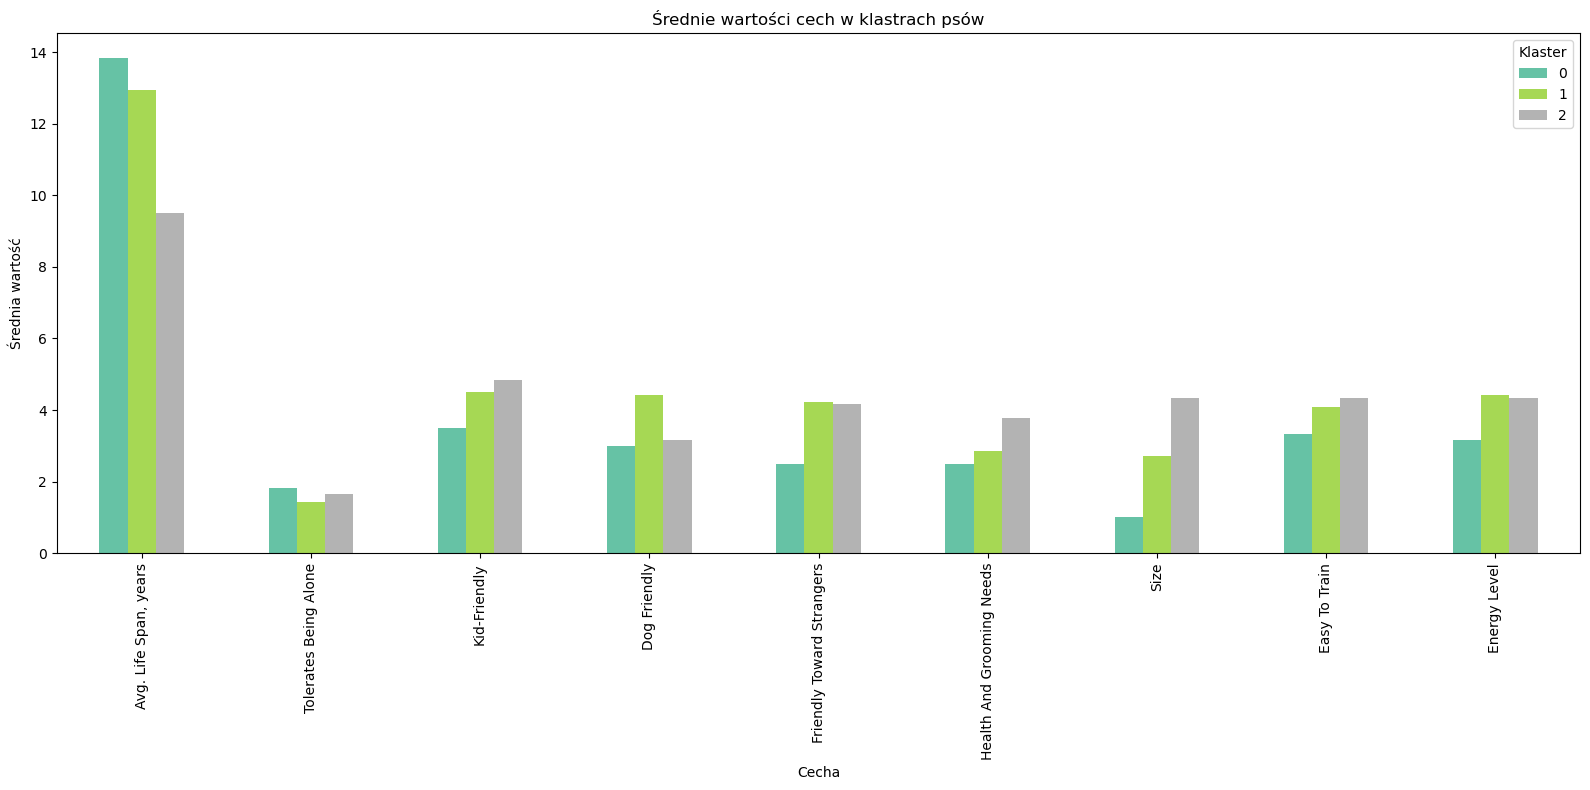

In [89]:
features = df_dogs.select_dtypes(include=['int64', 'float64']).columns.tolist()

cluster_summary = df_dogs.groupby('Cluster')[features].mean()

cluster_summary.T.plot(kind='bar', figsize=(16, 8), colormap='Set2')
plt.title("Średnie wartości cech w klastrach psów")
plt.ylabel("Średnia wartość")
plt.xlabel("Cecha")
plt.legend(title='Klaster')
plt.tight_layout()
plt.show()